### Стандартные импорты и настройки

In [196]:
from pprint import pprint

import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Scipy

Импортируем функции из библиотеки для кластеризации и векторного квантования.

https://docs.scipy.org/doc/scipy-0.18.1/reference/cluster.vq.html

In [197]:
from scipy.cluster.vq import whiten, kmeans2

### Подключаем API

Для примера используем открытое API, которое предоставляет данные о футбольных командах и матчах. 

http://api.football-data.org/docs/v1/index.html

Для полноценного использования лучше всего получить ключ, это довольно просто.

http://api.football-data.org/client/register

Для удобства зададим вспомогательный метод для обращения к API.

In [198]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, 
                            headers={'X-Auth-Token': 
                                     '0dfe6096ccd94946b7dbce0ee9ec77f0' })\
                                     .json()
        return json[result_key]
    except:
        #print(json)
        return json    

Получаем команды

In [199]:
team_quantity = call_api(
    'http://api.football-data.org/v1/competitions/446/?season=2016',
    'numberOfTeams')
teams = call_api(
    'http://api.football-data.org/v1/competitions/446/leagueTable?season=2016',
    'teams')



Готовим данные для трансформации в Pandas

In [200]:
team_for_pd = []
for i in range(24):
    team_for_pd.append({'teamname': teams['standing'][i]['teamName'], 
                        'losses': teams['standing'][i]['losses'], 
                        'marketvalue': np.random.randint(100000000, size=1)[0]})
team_for_pd


[{'losses': 7,
  'marketvalue': 791684650,
  'teamname': 'Wolverhampton Wanderers FC'},
 {'losses': 10, 'marketvalue': 498081175, 'teamname': 'Cardiff City FC'},
 {'losses': 8, 'marketvalue': 820194548, 'teamname': 'Fulham FC'},
 {'losses': 11, 'marketvalue': 899083009, 'teamname': 'Aston Villa FC'},
 {'losses': 14, 'marketvalue': 207808771, 'teamname': 'Middlesbrough FC'},
 {'losses': 11, 'marketvalue': 564883230, 'teamname': 'Derby County'},
 {'losses': 11, 'marketvalue': 511339115, 'teamname': 'Preston North End'},
 {'losses': 12, 'marketvalue': 757905645, 'teamname': 'Millwall FC'},
 {'losses': 13, 'marketvalue': 950008944, 'teamname': 'Brentford FC'},
 {'losses': 17, 'marketvalue': 503258152, 'teamname': 'Sheffield United FC'},
 {'losses': 13, 'marketvalue': 378752225, 'teamname': 'Bristol City'},
 {'losses': 20, 'marketvalue': 413341289, 'teamname': 'Ipswich Town'},
 {'losses': 20, 'marketvalue': 862249710, 'teamname': 'Leeds United'},
 {'losses': 16, 'marketvalue': 139553383, 't

Трансформируем

In [201]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,losses,marketvalue,teamname
0,7,791684650,Wolverhampton Wanderers FC
1,10,498081175,Cardiff City FC
2,8,820194548,Fulham FC
3,11,899083009,Aston Villa FC
4,14,207808771,Middlesbrough FC
5,11,564883230,Derby County
6,11,511339115,Preston North End
7,12,757905645,Millwall FC
8,13,950008944,Brentford FC
9,17,503258152,Sheffield United FC


Отображаем

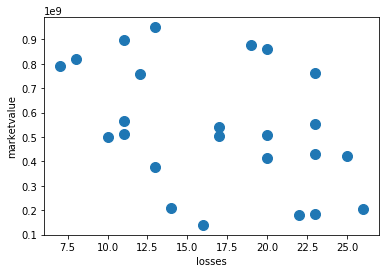

In [202]:
teams_pd.plot.scatter(x='losses', y='marketvalue', s=100)

Удаляем колонку с именами

In [203]:
del teams_pd['teamname']
teams_pd

,losses,marketvalue
0,7,791684650
1,10,498081175
2,8,820194548
3,11,899083009
4,14,207808771
5,11,564883230
6,11,511339115
7,12,757905645
8,13,950008944
9,17,503258152


Нормализация данных

In [204]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[1.25275497, 3.20552367],
       [1.78964996, 2.01672597],
       [1.43171997, 3.32095998],
       [1.96861495, 3.64037861],
       [2.50550994, 0.84141575],
       [1.96861495, 2.28720686],
       [1.96861495, 2.07040725],
       [2.14757995, 3.0687528 ],
       [2.32654495, 3.84657724],
       [3.04240493, 2.0376875 ],
       [2.32654495, 1.53356418],
       [3.57929992, 1.67361497],
       [3.57929992, 3.49124093],
       [2.86343993, 0.56505033],
       [3.04240493, 2.19491477],
       [3.57929992, 2.0622007 ],
       [4.11619491, 1.74373281],
       [3.40033492, 3.54909101],
       [4.65308989, 0.83546932],
       [3.93722991, 0.73420304],
       [4.11619491, 2.23744706],
       [4.11619491, 3.09194568],
       [4.4741249 , 1.70338391],
       [4.11619491, 0.75002227]])

Сделаем 3 кластера

In [205]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[1.85676183, 2.64293991],
        [3.66878242, 1.44826187],
        [3.35559367, 3.49471371]]),
 array([0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
        1, 1]))

Зададим цвета для каждого кластера

In [206]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['r',
 'r',
 'r',
 'r',
 'g',
 'r',
 'r',
 'r',
 'b',
 'g',
 'r',
 'g',
 'b',
 'g',
 'g',
 'g',
 'g',
 'b',
 'g',
 'g',
 'g',
 'b',
 'g',
 'g']

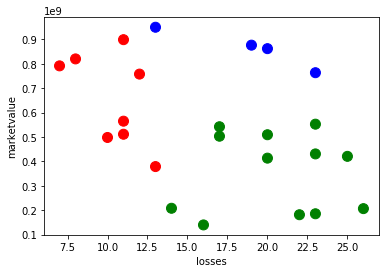

In [207]:
teams_pd.plot.scatter(x='losses', y='marketvalue', c=colors, s=100)

Теперь попробуем сделать больше кластеров.

In [208]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[4.08636741, 1.70930813],
        [3.69860991, 3.37742587],
        [2.35637245, 2.02341776],
        [1.82544296, 3.41643846],
        [3.35559367, 0.72267285]]),
 array([3, 2, 3, 3, 4, 2, 2, 3, 3, 2, 2, 0, 1, 4, 2, 0, 0, 1, 0, 4, 0, 1,
        0, 4]))

In [209]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['y',
 'b',
 'y',
 'y',
 'm',
 'b',
 'b',
 'y',
 'y',
 'b',
 'b',
 'r',
 'g',
 'm',
 'b',
 'r',
 'r',
 'g',
 'r',
 'm',
 'r',
 'g',
 'r',
 'm']

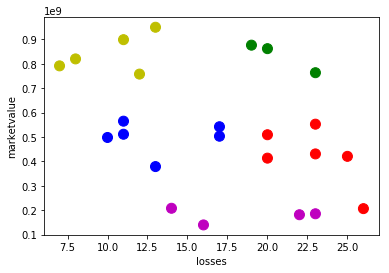

In [210]:
teams_pd.plot.scatter(x='losses', y='marketvalue', c=colors, s=100)